In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2 as cv

# TRANSFORMASI WAVELET

# NOMOR 1

# DEKOMPOSISI

In [12]:
def padding(matriks, num_pad):
    return np.pad(matriks, pad_width=(0, num_pad), mode='constant')

def filter_pertama(matriks, _filter, image):
    rows, cols = image.shape
    conv = np.zeros((rows, cols))
    for i in range(rows):
        for j in range(cols):
            for x in range(len(_filter)):
                conv[i][j] += matriks[i][j+x] * _filter[x]
    return conv

def filter_kedua(matriks, _filter, image):
    rows, cols = image.shape
    conv = np.zeros((rows, cols))
    for i in range(rows):
        for j in range(cols):
            for x in range(len(_filter)):
                conv[i][j] += matriks[i+x][j] * _filter[x]
    return conv

def downsampling_pertama(kernel):
    rows, cols = kernel.shape
    new_rows = rows
    new_cols = cols // 2
    downsampled = np.zeros((new_rows, new_cols))
    for i in range(new_rows):
        for j in range(new_cols):
            downsampled[i][j] = kernel[i][2*j]  
    return downsampled

def downsampling_kedua(kernel):
    rows, cols = kernel.shape
    new_rows = rows // 2
    new_cols = cols
    downsampled = np.zeros((new_rows, new_cols))
    for i in range(new_rows):
        downsampled[i][:] = kernel[2*i][:]  
    return downsampled

Fungsi padding. Fungsi ini menambahkan "padding" ke matriks, yaitu menambahkan beberapa nilai di sekitar tepi matriks. Misalnya, matriks sebagai gambar dan padding adalah menambahkan bingkai putih di sekeliling gambar. Ini membantu dalam proses pengolahan gambar seperti konvolusi agar tepi gambar tidak terpengaruh terlalu banyak.
Fungsi filter_pertama. Ini adalah langkah pertama dalam proses konvolusi. Jika memindai matriks gambar dengan "filter" kecil untuk mendeteksi pola. Fungsi ini menggeser filter ke kanan di setiap langkah, mengalikan nilai-nilai filter dengan nilai-nilai di bawahnya, dan mengakumulasikan hasilnya. Ini membantu mengidentifikasi fitur-fitur dalam gambar, seperti tepi atau sudut. Fungsi filter_kedua. Langkah kedua dalam proses konvolusi. Filter digeser ke bawah di setiap langkah, bukan ke kanan seperti pada fungsi pertama. Ini membantu kita menangkap fitur-fitur yang mungkin terlewatkan dalam langkah pertama.
Fungsi downsampling_pertama. Setelah melakukan konvolusi, memperkecil gambar agar lebih mudah untuk diproses. Fungsi ini memperkecil gambar dengan mengambil setiap kolom kedua dari matriks. Jadi, gambar yang lebih besar direpresentasikan dengan gambar yang lebih kecil, tetapi dengan tetap mempertahankan fitur-fitur utama. Fungsi downsampling_kedua. Mirip dengan fungsi sebelumnya, hanya kali ini kita memperkecil gambar dengan mengambil setiap baris kedua dari matriks.


Pertama membaca sebuah gambar dari file bernama 'IoriYagami.jpg'. Kemudian, memisahkan gambar tersebut menjadi tiga bagian, yaitu bagian merah, hijau, dan biru. Yang ditampilkan di sini adalah bagian birunya saja. Ketika menggunakan 'plt.imshow', itu artinya ingin menampilkan gambar. Lalu, menentukan hanya ingin menampilkan bagian biru tetapi karena cmap='gray' maka, warna biru akan diubah menjadi warna grayscale. 

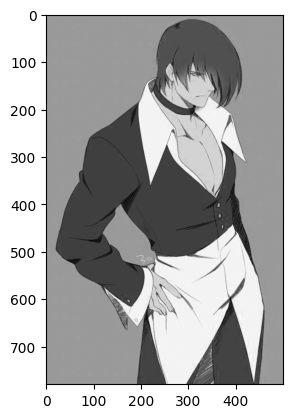

In [13]:
image = plt.imread('IoriYagami.jpg')

image0 = image[:,:,0] 
image1 = image[:,:,1]
image2 = image[:,:,2] 
plt.imshow(image2, cmap='gray')

In [14]:
lpf = np.array([0.5, 0.5])
hpf = np.array([-0.5, 0.5])

LPF digunakan untuk mempertahankan atau memperhalus komponen citra dengan frekuensi rendah, sementara menghilangkan atau mengurangi komponen frekuensi tinggi. Ini bisa berguna dalam menghilangkan noise (gangguan) dari gambar atau dalam mereduksi detail yang tidak diinginkan. Misalnya, ketika ingin membuat gambar tampak lebih halus atau kurang berisik.
HPF, sebaliknya, bertujuan untuk mempertahankan atau meningkatkan komponen citra dengan frekuensi tinggi, sementara menghilangkan atau mengurangi komponen frekuensi rendah. Ini sering digunakan untuk menyoroti detail atau tepi dalam gambar. Misalnya, dalam deteksi tepi atau dalam penekanan fitur-fitur penting dalam citra.

## PENGAPLIKASIAN FUNCTION YANG TELAH DIINISIALISAI SBELUMNYA

In [15]:
padded = padding(image2, 7)
convolvedpertama = filter_pertama(padded, lpf, image2)
downsampledpertama = downsampling_pertama(convolvedpertama)
paddedkedua = padding(downsampledpertama, 7)
convolvedkedua = filter_kedua(paddedkedua, lpf, downsampledpertama)
approximate = downsampling_kedua(convolvedkedua)

padded = padding(image2, 7)
convolvedpertama = filter_pertama(padded, lpf, image2)
downsampledpertama = downsampling_pertama(convolvedpertama)
paddedkedua = padding(downsampledpertama, 7)
convolvedkedua = filter_kedua(paddedkedua, hpf, downsampledpertama)
horizontal = downsampling_kedua(convolvedkedua)

padded = padding(image2, 7)
convolvedpertama = filter_pertama(padded, hpf, image2)
downsampledpertama = downsampling_pertama(convolvedpertama)
paddedkedua = padding(downsampledpertama, 7)
convolvedkedua = filter_kedua(paddedkedua, lpf, downsampledpertama)
vertical = downsampling_kedua(convolvedkedua)

padded = padding(image2, 7)
convolvedpertama = filter_pertama(padded, hpf, image2)
downsampledpertama = downsampling_pertama(convolvedpertama)
paddedkedua = padding(downsampledpertama, 7)
convolvedkedua = filter_kedua(paddedkedua, hpf, downsampledpertama)
diagonal = downsampling_kedua(convolvedkedua)

Padding, gambar diisi dengan nilai piksel tambahan di sekelilingnya untuk memperluasnya. Ini membantu dalam proses filtering dan downsampling nanti.
Filtering Pertama, gambar yang telah di-"padded" ini kemudian difilter menggunakan filter pertama (LPF atau HPF). LPF (Low Pass Filter) digunakan untuk mendapatkan bagian "kasar" atau "halus" dari gambar, sedangkan HPF (High Pass Filter) digunakan untuk mendapatkan bagian "detail" atau "tepi" dari gambar.
Downsampling Pertama, setelah proses filtering, gambar di-"downsampled" atau direduksi ukurannya dengan cara mengambil hanya setiap beberapa piksel, sehingga menghasilkan gambar yang lebih kecil.
Filtering Kedua, gambar yang telah di-"downsampled" kemudian kembali difilter dengan filter kedua (LPF atau HPF). Ini membantu dalam mengekstraksi informasi yang lebih detail atau kasar, tergantung pada jenis filter yang digunakan.
Downsampling Kedua,langkah terakhir adalah mengurangi ukuran gambar lagi dengan "downsampling" untuk mendapatkan gambar yang lebih kecil dan lebih terfokus pada informasi tertentu.
Plotting, hasil dari proses transformasi wavelet ini ditampilkan dalam empat gambar yang berbeda: gambar aproksimasi (kasar), gambar horizontal, gambar vertikal, dan gambar diagonal.

Menampilkan gambar yang telah diubah menjadi approximate, horizontal, vertikal, dan diganonal dan memberikan title sesuai dengan gambarnya 

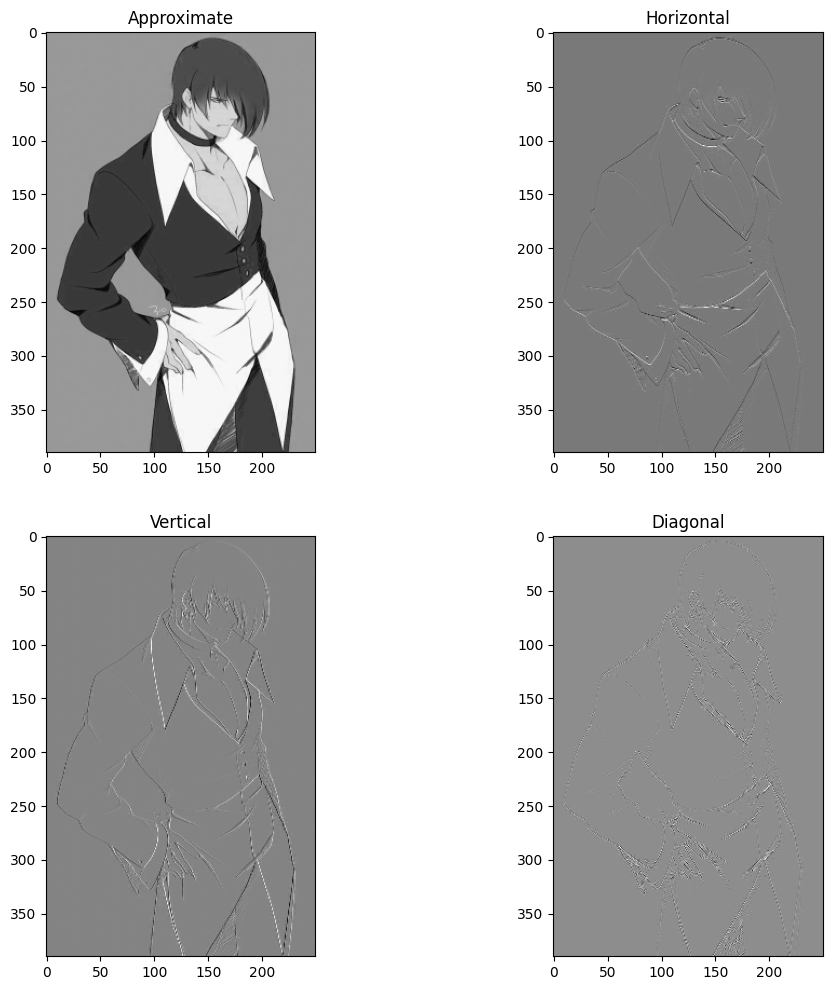

In [16]:
plt.figure(figsize=(12, 12))
plt.subplot(221), plt.imshow(approximate, cmap='gray'), plt.title('Approximate')
plt.subplot(222), plt.imshow(horizontal, cmap='gray'), plt.title('Horizontal')
plt.subplot(223), plt.imshow(vertical, cmap='gray'), plt.title('Vertical')
plt.subplot(224), plt.imshow(diagonal, cmap='gray'), plt.title('Diagonal')
plt.show()

## MEMBUAT LEVEL YANG DIINGINKAN

In [17]:
def decomposecombine(image, lpf, hpf, current_level, max_level):
    if current_level > max_level:
        return image

    padded = padding(image, 7)
    convolvedpertama = filter_pertama(padded, lpf, image)
    downsampledpertama = downsampling_pertama(convolvedpertama)
    paddedkedua = padding(downsampledpertama, 7)
    convolvedkedua = filter_kedua(paddedkedua, lpf, downsampledpertama)
    approximate = downsampling_kedua(convolvedkedua)

    plt.figure(figsize=(12, 12))
    plt.subplot(221), plt.imshow(approximate, cmap='gray'), plt.title(f'Approximate (Level {current_level})')

    convolvedpertama_h = filter_pertama(padded, lpf, image)
    downsampledpertama_h = downsampling_pertama(convolvedpertama_h)
    paddedkedua_h = padding(downsampledpertama_h, 7)
    convolvedkedua_h = filter_kedua(paddedkedua_h, hpf, downsampledpertama_h)
    horizontal = downsampling_kedua(convolvedkedua_h)

    convolvedpertama_v = filter_pertama(padded, hpf, image)
    downsampledpertama_v = downsampling_pertama(convolvedpertama_v)
    paddedkedua_v = padding(downsampledpertama_v, 7)
    convolvedkedua_v = filter_kedua(paddedkedua_v, lpf, downsampledpertama_v)
    vertical = downsampling_kedua(convolvedkedua_v)

    convolvedpertama_d = filter_pertama(padded, hpf, image)
    downsampledpertama_d = downsampling_pertama(convolvedpertama_d)
    paddedkedua_d = padding(downsampledpertama_d, 7)
    convolvedkedua_d = filter_kedua(paddedkedua_d, hpf, downsampledpertama_d)
    diagonal = downsampling_kedua(convolvedkedua_d)

    plt.subplot(222), plt.imshow(horizontal, cmap='gray'), plt.title(f'Horizontal (Level {current_level})')
    plt.subplot(223), plt.imshow(vertical, cmap='gray'), plt.title(f'Vertical (Level {current_level})')
    plt.subplot(224), plt.imshow(diagonal, cmap='gray'), plt.title(f'Diagonal (Level {current_level})')
    plt.show()

    return decomposecombine(approximate, lpf, hpf, current_level + 1, max_level)


Kode di atas adalah program yang digunakan untuk memproses gambar dengan teknik yang disebut dengan "decomposition" atau pembagian dan penggabungan (combine). Ide dasarnya adalah membagi gambar menjadi bagian-bagian yang lebih kecil, kemudian melakukan operasi tertentu pada setiap bagian tersebut, dan akhirnya menggabungkan kembali hasilnya.

1. Fungsi 'decomposecombine' mengambil gambar, dua filter (low-pass filter dan high-pass filter), level saat ini, dan level maksimum sebagai input.

2. Jika level saat ini lebih besar dari level maksimum, maka fungsi akan mengembalikan gambar tanpa melakukan lebih banyak pemrosesan. Ini berarti kita telah mencapai level kedalaman yang diinginkan dalam pembagian dan penggabungan.

3. Gambar di-padding terlebih dahulu untuk memastikan bahwa operasi konvolusi dapat dilakukan tanpa kehilangan informasi di tepi gambar.

4. Gambar kemudian dilakukan konvolusi dengan filter pertama ('lpf' atau 'hpf') yang telah diberikan.

5. Hasil konvolusi tersebut kemudian di-downsample, artinya ukuran gambar tersebut dikurangi sehingga menjadi lebih kecil.

6. Setelah itu, gambar hasil downsampling tersebut kembali dipadding, kemudian dijalankan konvolusi dengan filter kedua.

7. Hasil konvolusi kedua tersebut juga di-downsample lagi.

8. Proses ini menghasilkan empat bagian gambar: approximate (mencakup informasi gambar yang lebih kasar), horizontal (informasi horizontal), vertical (informasi vertikal), dan diagonal (informasi diagonal).

9. Kemudian, program menampilkan keempat bagian tersebut menggunakan library matplotlib.

10. Proses ini diulang kembali untuk bagian approximate, dengan menambahkan satu level ke dalam kedalaman pembagian dan penggabungan gambar.

Dengan cara ini, program membagi gambar menjadi bagian-bagian yang lebih kecil, memproses setiap bagian dengan cara tertentu, dan kemudian menggabungkan kembali hasilnya. Hal ini dapat membantu dalam analisis atau manipulasi gambar untuk berbagai tujuan, seperti kompresi gambar atau pengolahan citra.

max_recursive_level = 6, ini adalah variabel yang menentukan level maksimum kedalaman rekursi berarti proses yang memanggil dirinya sendiri. Jadi, maksudnya adalah, dalam pemrosesan gambar ini, hanya akan pergi hingga level 6 kedalaman maksimum.
decomposecombine(image2, lpf, hpf, current_level=1, max_level=max_recursive_level), ini adalah pemanggilan fungsi. Fungsi ini disebut decomposecombine. Fungsi ini menerima beberapa argumen (yang diberi nama), yaitu image2, lpf, hpf, current_level, dan max_level. Ini adalah cara untuk memberitahu fungsi apa yang harus dilakukan dan dengan apa. image2, lpf, dan hpf kemungkinan besar adalah gambar atau representasi gambar dalam beberapa bentuk. current_level adalah level saat ini dari proses rekursi (atau bagian dalam proses berulang yang saat ini kita kerjakan), dan max_level adalah level maksimum yang telah  ditetapkan sebelumnya.

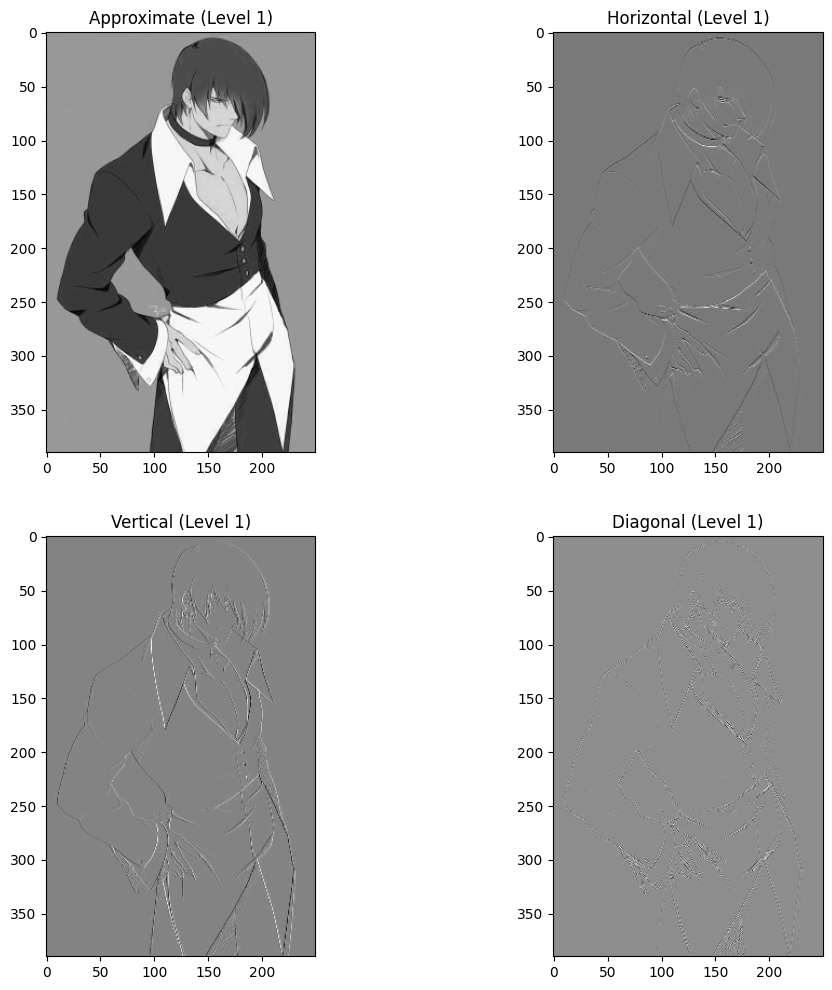

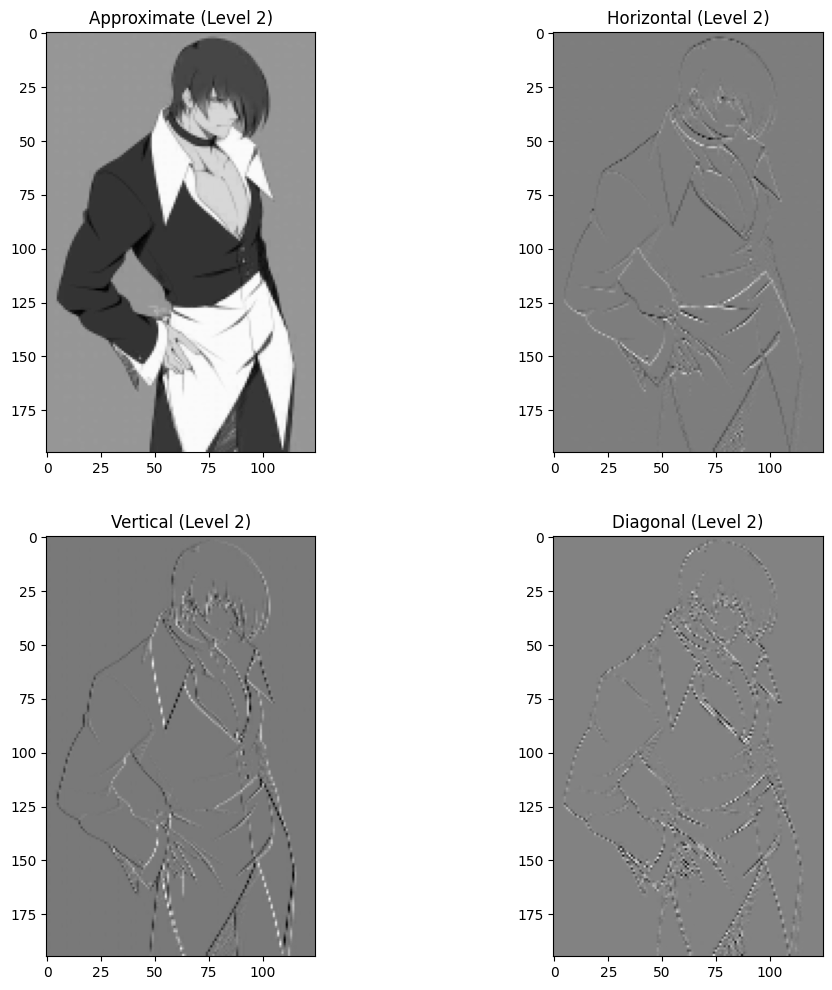

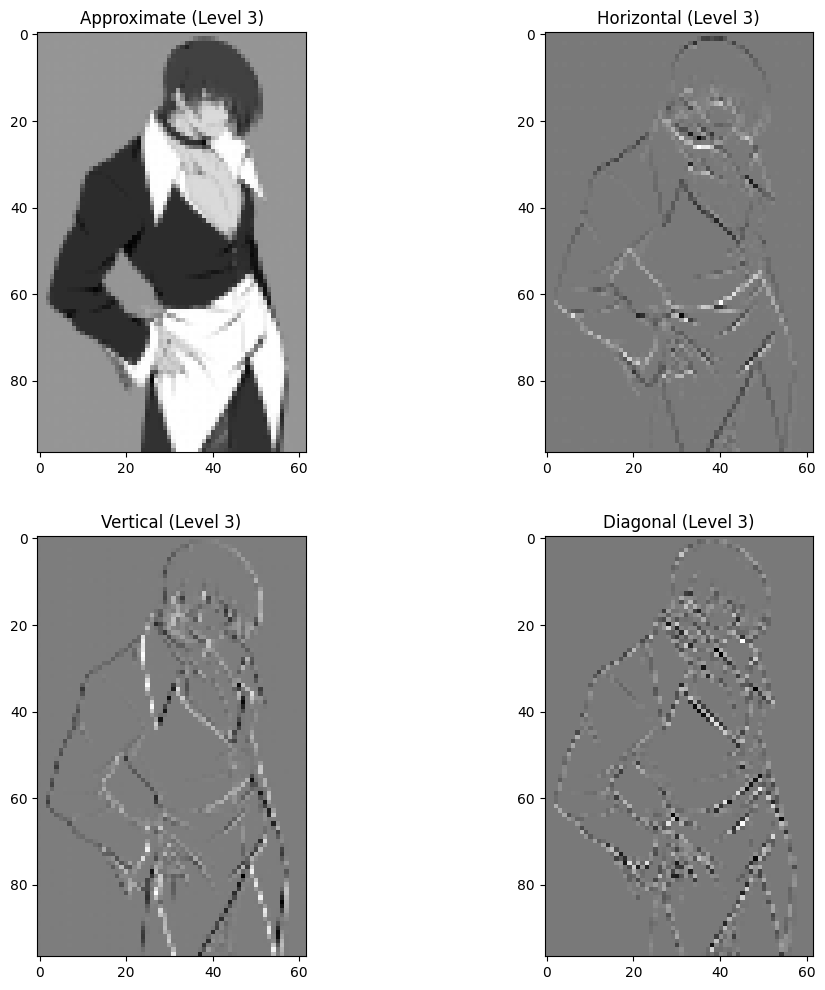

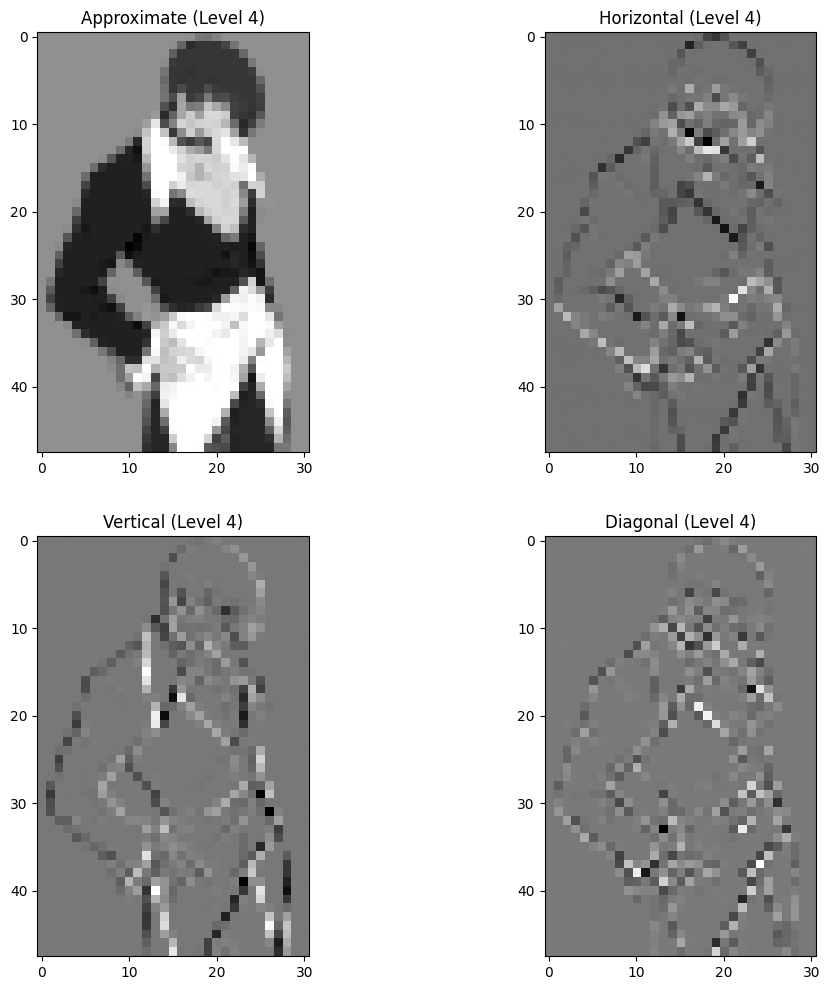

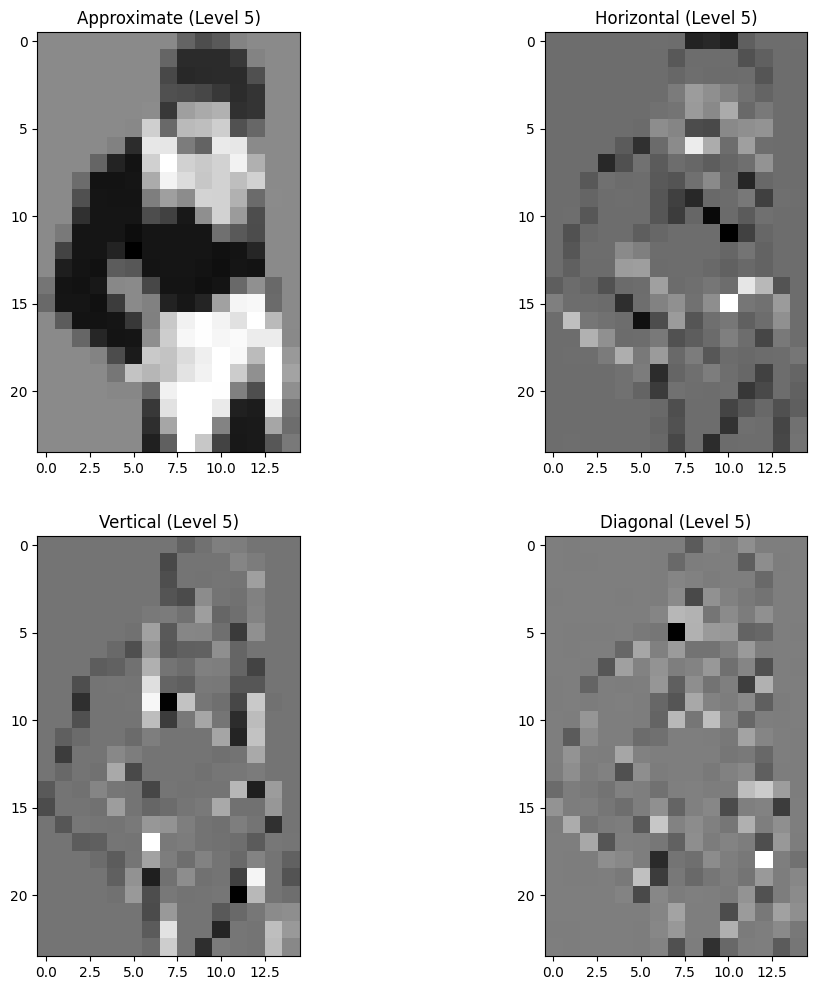

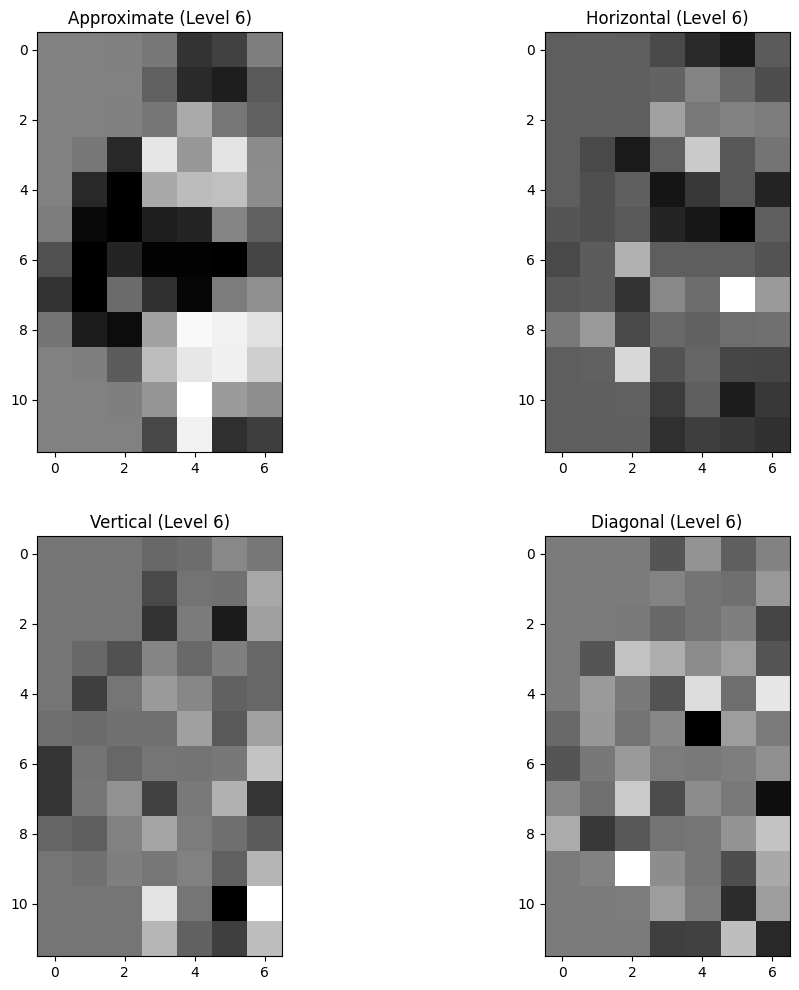

array([[153.09667969, 153.10351562, 153.0703125 , 146.03710938,
         97.46313477, 108.71899414, 151.8605957 ],
       [153.17285156, 153.12109375, 153.125     , 129.56030273,
         91.49169922,  82.92407227, 125.64282227],
       [153.17578125, 153.0859375 , 152.89282227, 145.49121094,
        182.7409668 , 146.01123047, 129.94165039],
       [153.07421875, 146.00830078,  90.71337891, 225.09985352,
        169.1315918 , 223.453125  , 160.56445312],
       [153.10351562,  90.82324219,  62.46972656, 181.71875   ,
        195.69726562, 198.5       , 161.1809082 ],
       [149.8605957 ,  68.18798828,  61.46337891,  82.54296875,
         87.14013672, 156.10302734, 129.58691406],
       [118.66040039,  62.16748047,  87.90869141,  62.78222656,
         62.72094727,  61.08764648, 110.95068359],
       [ 97.94384766,  62.30517578, 138.04174805,  95.88769531,
         65.63110352, 149.54467773, 163.4934082 ],
       [144.26977539,  81.20947266,  69.71704102, 177.07617188,
        239.0253

In [18]:
max_recursive_level = 6

decomposecombine(image2, lpf, hpf, current_level=1, max_level=max_recursive_level)

## REKONSTRUKSI

rekonstruksi = approximate + horizontal + vertical + diagonal adalah langkah pertama dalam proses "rekonstruksi" gambar. Di sini, membuat gambar baru dengan cara menambahkan beberapa gambar approximate, horizontal, vertical, dan diagonal pada langkah sebelumnya ke gambar asli. program ini mengambil gambar asli, menambahkan beberapa gambar pada langkah sebelumnya untuk membuat gambar baru, dan menampilkan gambar asli serta gambar yang sudah diolah di jendela yang terpisah untuk dibandingkan.

Text(0.5, 1.0, 'Rekonstruksi (Level 1)')

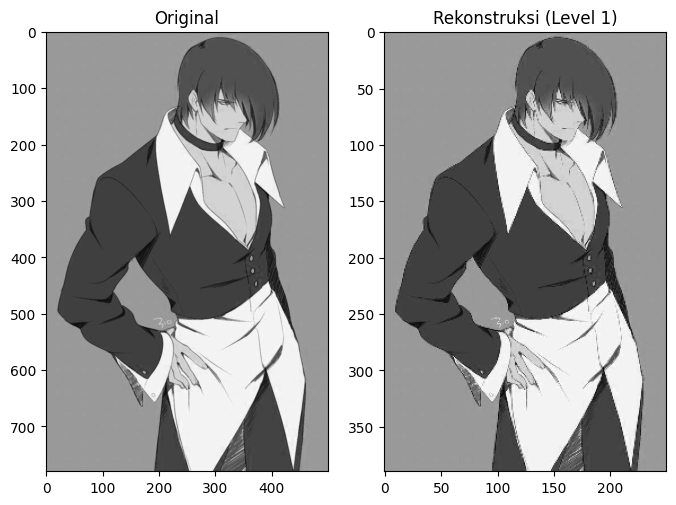

In [19]:
rekonstruksi = approximate + horizontal + vertical + diagonal
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(image2, cmap='gray')
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(rekonstruksi, cmap='gray')
plt.title('Rekonstruksi (Level 1)')


# NOMOR 3

In [20]:
approximate

array([[152.5, 154. , 153.5, ..., 154. , 152. , 153.5],
       [152.5, 154. , 153.5, ..., 154. , 152. , 153.5],
       [152.5, 154. , 153.5, ..., 154. , 152. , 153.5],
       ...,
       [153. , 153. , 153. , ..., 153. , 153. , 153. ],
       [153. , 153. , 153. , ..., 154. , 152. , 153.5],
       [153. , 153. , 153. , ..., 154. , 152. , 153.5]])

In [21]:
horizontal

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
vertical

array([[ 0.5,  0. , -0.5, ...,  0. ,  0. ,  0.5],
       [ 0.5,  0. , -0.5, ...,  0. ,  0. ,  0.5],
       [ 0.5,  0. , -0.5, ...,  0. ,  0. ,  0.5],
       ...,
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0.5],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0.5]])

In [23]:
diagonal

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# NOMOR 4

In [24]:
def grafik(image):
    height, width = image.shape

    x = np.arange(0, width)

    y = np.mean(image, axis=0)  

    plt.plot(x, y)

    plt.title('dekomposisi')
    plt.xlabel('indeks')
    plt.ylabel('amplitudo')

    plt.show()

Kode di atas adalah sebuah fungsi yang disebut 'grafik'. Fungsi ini mengambil sebuah gambar sebagai masukan. Pertama-tama, kode ini mengambil ukuran tinggi dan lebar dari gambar tersebut. Kemudian, ia membuat sebuah kumpulan angka dari 0 sampai lebar gambar.

Selanjutnya, kode ini menghitung nilai rata-rata dari setiap kolom dalam gambar menggunakan 'np.mean'. Ini artinya, ia mengambil rata-rata dari nilai pixel di setiap kolom gambar. Hasilnya adalah kumpulan nilai yang merepresentasikan rata-rata kecerahan setiap kolom.

Kemudian, kode ini menggunakan 'plt.plot' untuk membuat grafik garis. Di sini, sumbu-x mewakili indeks (posisi) dari kolom gambar, dan sumbu-y mewakili nilai rata-rata kecerahan dari kolom tersebut.

Setelah itu, kode menambahkan judul grafik, label sumbu-x, dan label sumbu-y menggunakan 'plt.title', 'plt.xlabel', dan 'plt.ylabel' secara berturut-turut.

Terakhir, kode ini menampilkan grafik yang sudah dibuat dengan 'plt.show`.

Fungsi ini mengambil gambar dan membuat grafik yang menunjukkan bagaimana kecerahan rata-rata berubah sepanjang lebar gambar.

Menampilkan grafik dekomposisi pada approximate

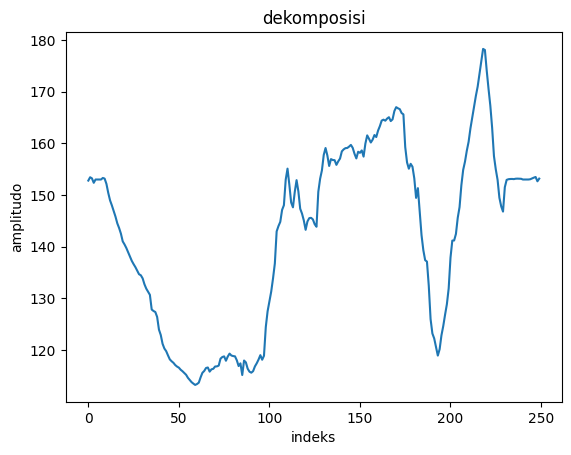

In [25]:
apro = grafik(approximate)             

Menampilkan grafik dekomposisi pada horizontal

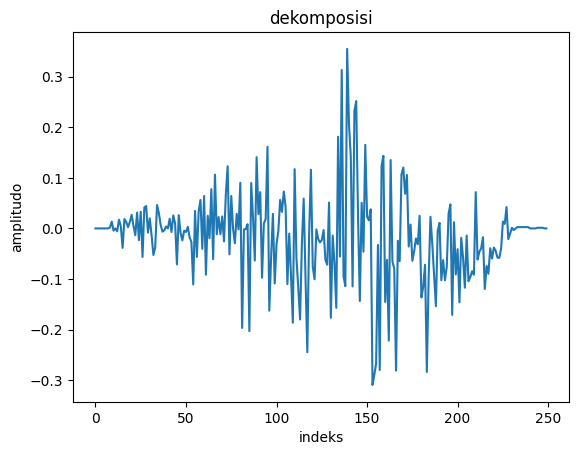

In [26]:
hori = grafik(horizontal)

Menampilkan grafik dekomposisi pada vertical

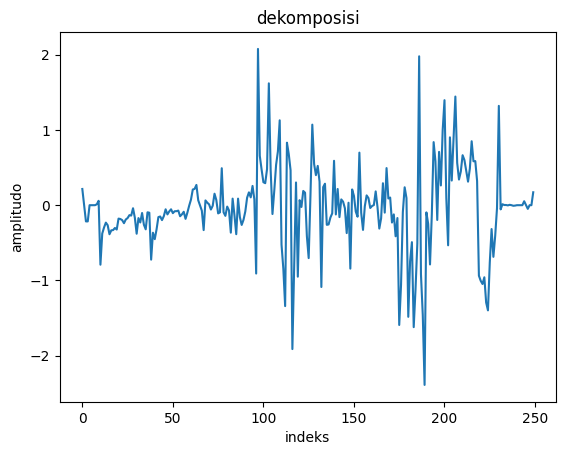

In [27]:
verti = grafik(vertical)               

Menampilkan grafik dekomposisi pada diagonal

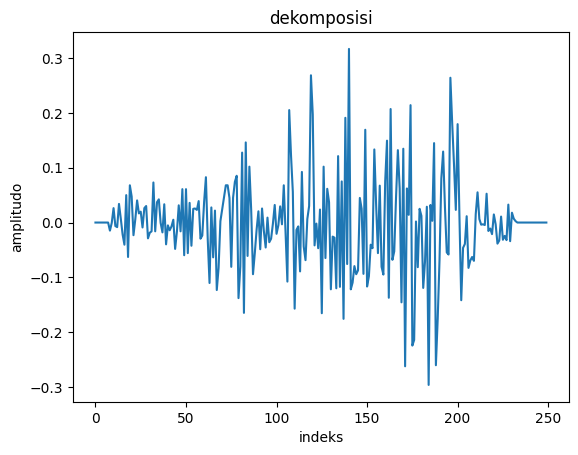

In [28]:
diag = grafik(diagonal)